<a href="https://colab.research.google.com/github/Jayesh2422/ML_LAB/blob/main/Lab1%262New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [14]:
df = pd.read_csv('diabetes_data_upload.csv')

df = df.replace({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0,
    'Positive': 1,
    'Negative': 0,
})

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [15]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
for col in df.columns:
    print(col)

Dataset Shape: (520, 17)

Column Names:
Age
Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity
class


In [16]:
df.info()
print("\nMissing Values:\n")
print(df.isnull().sum())

df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])


<class 'pandas.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 non-null    o

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
10%,32.000000
25%,39.000000
50%,47.500000
75%,57.000000
90%,65.000000
max,90.000000


In [17]:
df_clean = df.drop(columns=['STUDENT ID'], errors='ignore')
df_clean.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


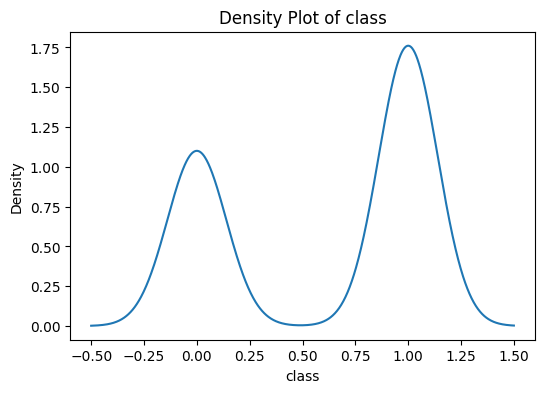

In [18]:
target_col = df.columns[-1]

plt.figure(figsize=(6,4))
df[target_col].plot.density()
plt.title(f'Density Plot of {target_col}')
plt.xlabel(target_col)
plt.show()


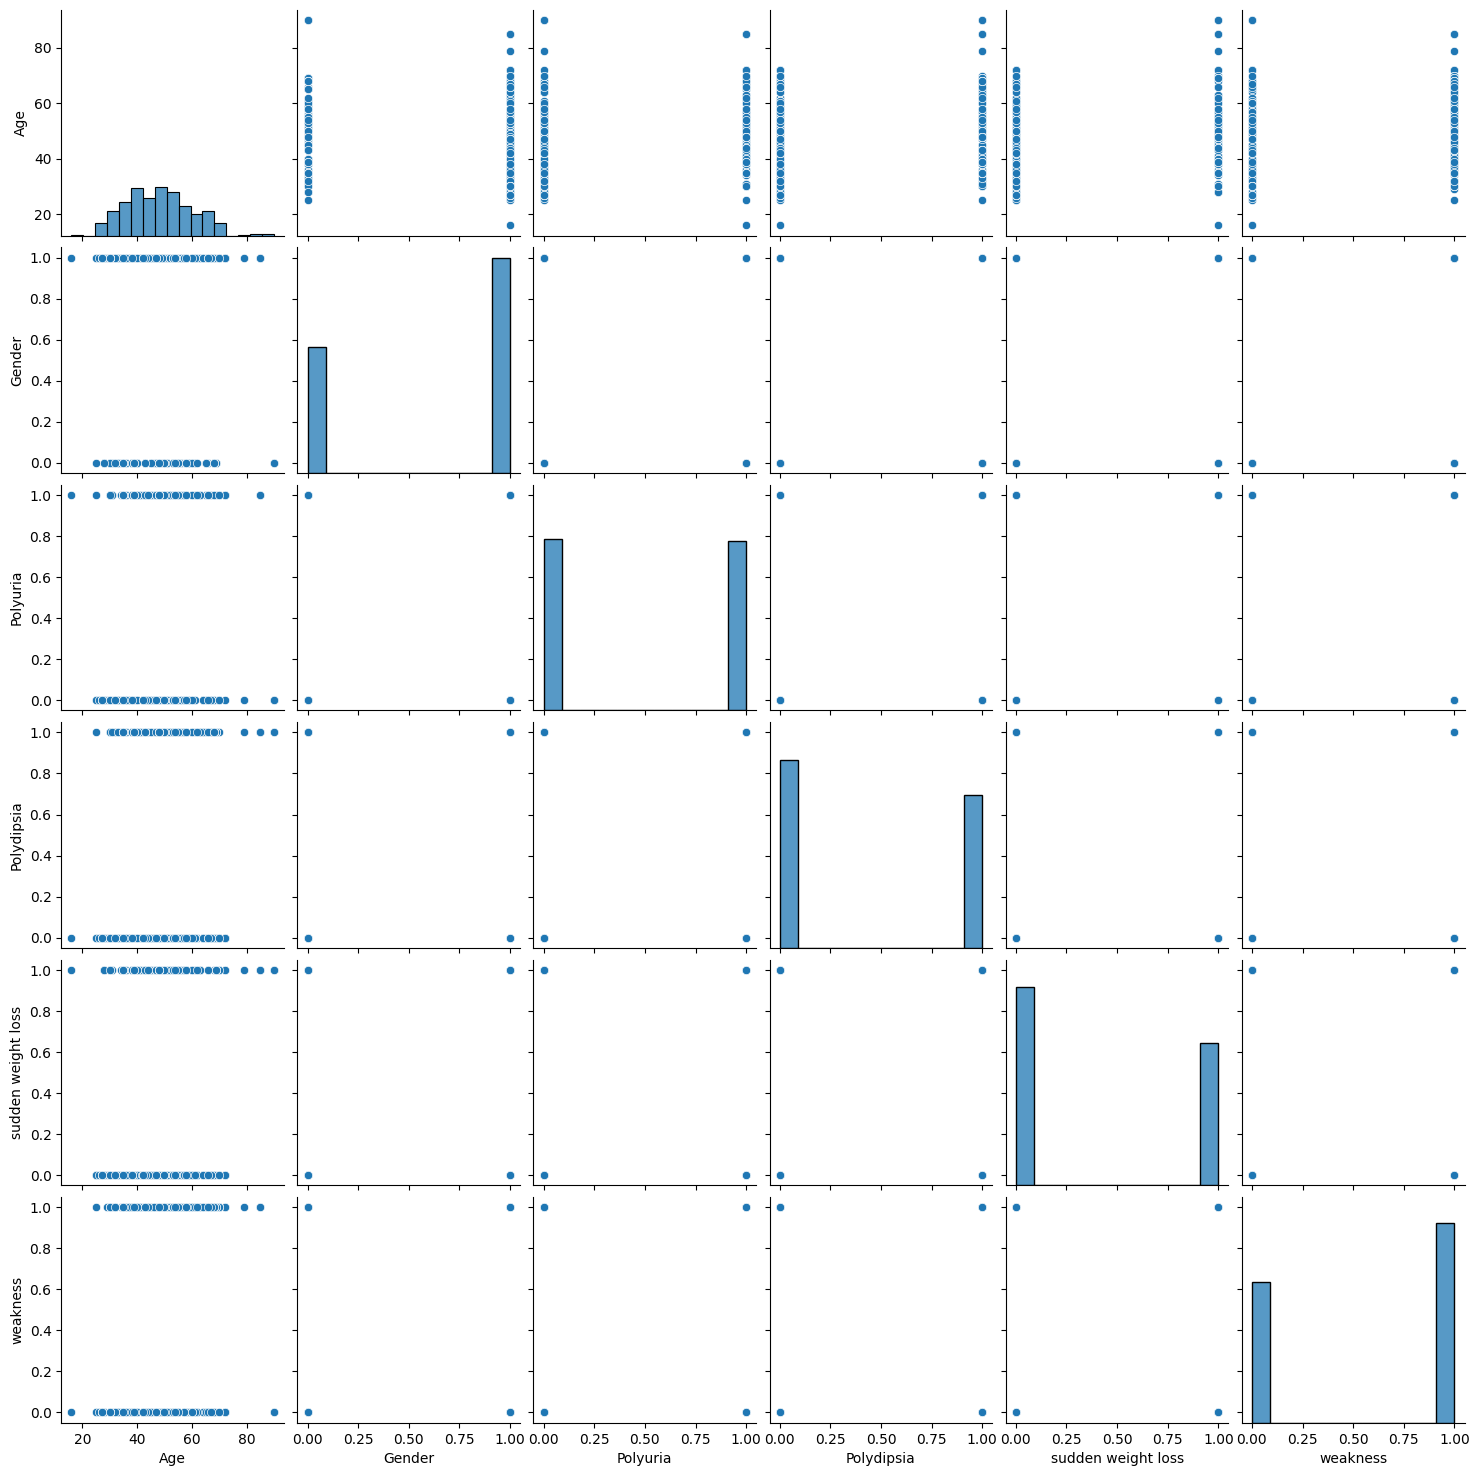

In [19]:
sample_cols = df_clean.columns[:6]
sns.pairplot(df_clean[sample_cols])

In [20]:
correlation_matrix = df_clean.select_dtypes(include=['int64','float64']).corr()
correlation_matrix


,Age
Age,1.0


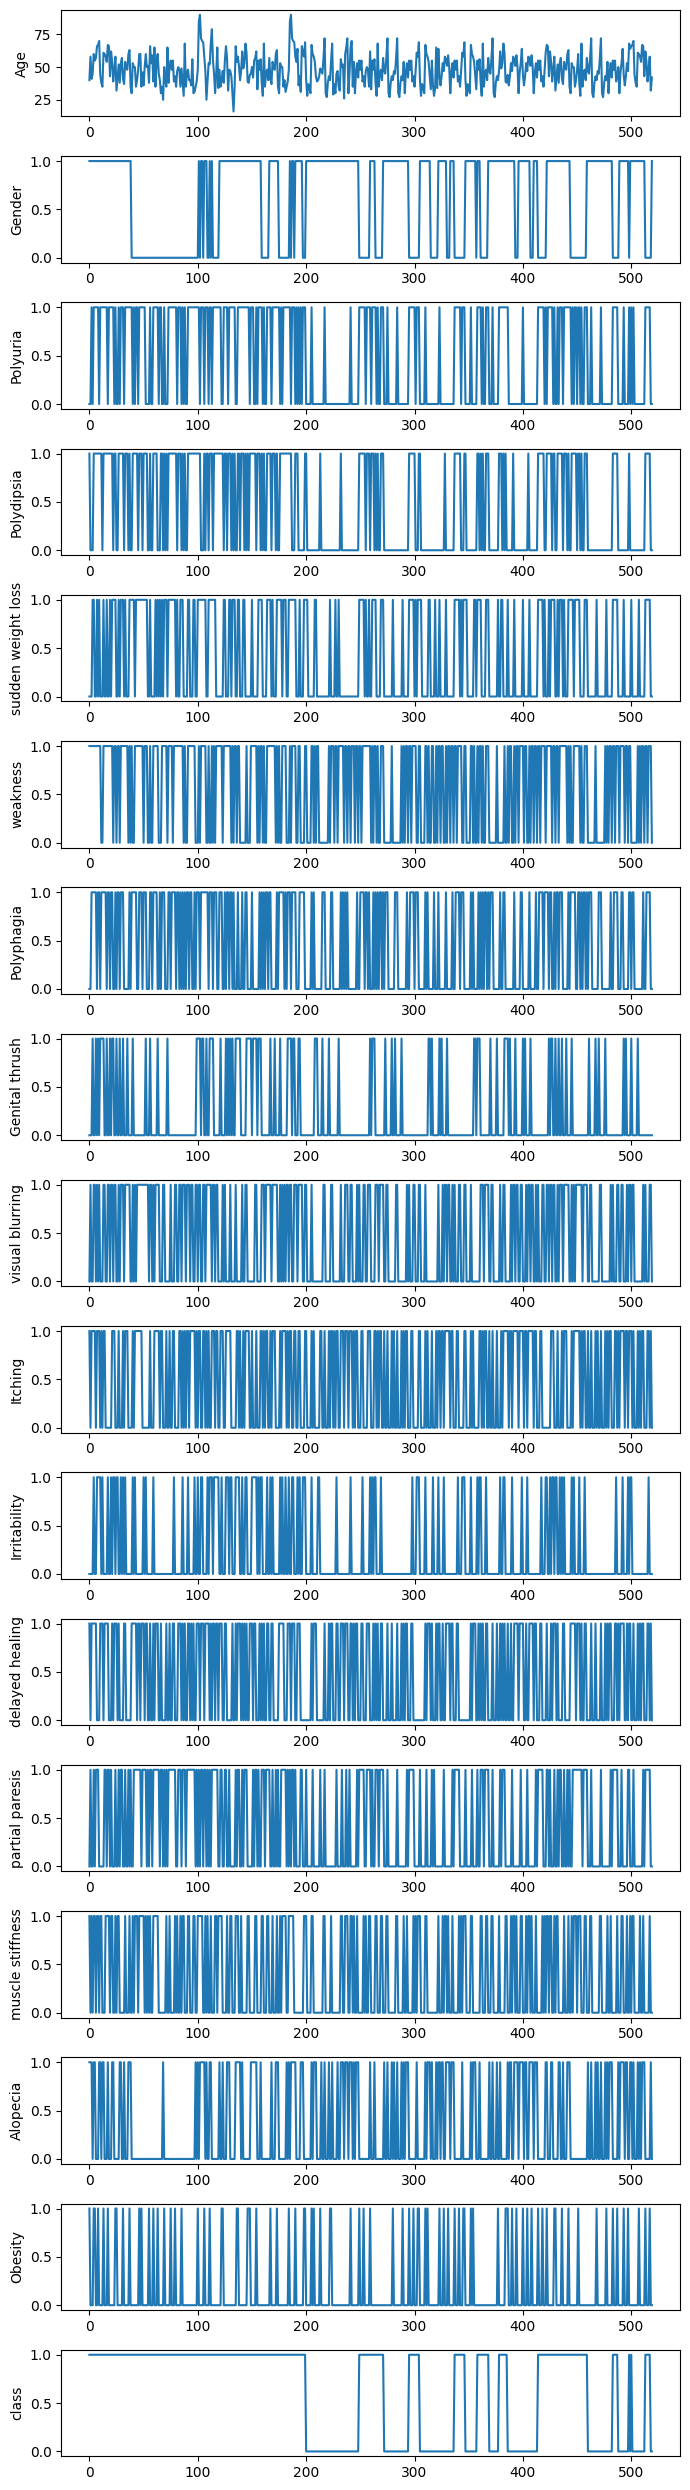

In [21]:
fig, axs = plt.subplots(len(df_clean.columns), 1, figsize=(7, 25))
for i, col in enumerate(df_clean.columns):
    axs[i].plot(df_clean[col])
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()


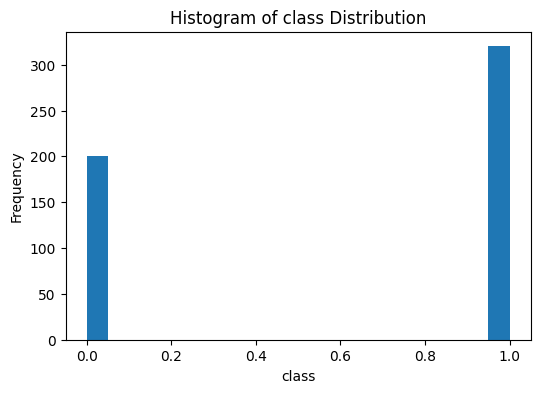

In [22]:
target_col = df_clean.columns[-1]

plt.figure(figsize=(6,4))
plt.hist(df_clean[target_col], bins=20)
plt.title(f'Histogram of {target_col} Distribution')
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.show()


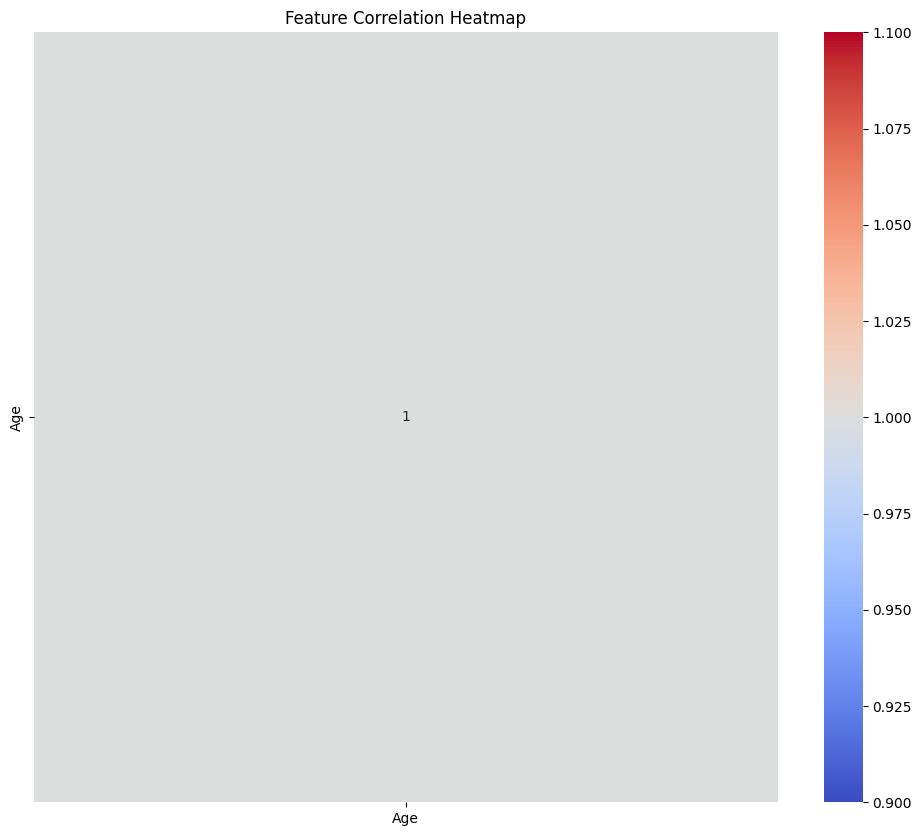

In [23]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [24]:
target_col = df_clean.columns[-1]

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (520, 16)
y shape: (520,)


In [25]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
target_col = numeric_df.columns[-1]

corr_target = numeric_df.corr()[target_col].sort_values(ascending=False)
corr_target


Age    1.0
Name: Age, dtype: float64

In [26]:
important_features = corr_target[abs(corr_target) > 0.2]
important_features

Age    1.0
Name: Age, dtype: float64

In [27]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_numeric)
X_minmax[:5]


array([[0.32432432],
       [0.56756757],
       [0.33783784],
       [0.39189189],
       [0.59459459]])

In [28]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

print("Variance:\n", numeric_df.var())
print("\nStandard Deviation:\n", numeric_df.std())


Variance:
 Age    147.658126
dtype: float64

Standard Deviation:
 Age    12.151466
dtype: float64


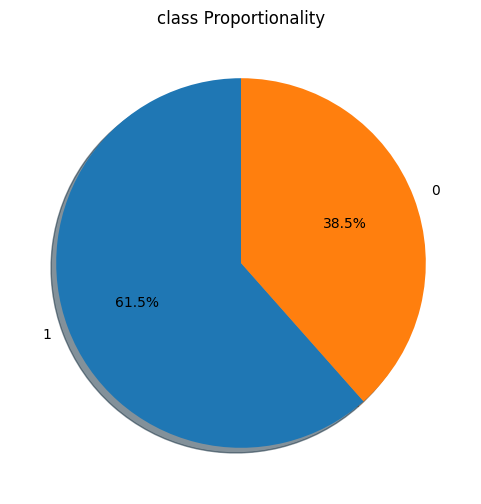

In [29]:
target_col = df.columns[-1]

plt.figure(figsize=(6,6))
grade_counts = df[target_col].value_counts()
plt.pie(
    grade_counts,
    labels=grade_counts.index,
    autopct='%.1f%%',
    shadow=True,
    startangle=90
)
plt.title(f'{target_col} Proportionality')
plt.show()
